In [1]:
import pandas as pd
import pyBigWig
import numpy as np

In [2]:
def get_cts(peaks_df, bw, width):
    vals = []
    for i, r in peaks_df.iterrows():
        val = np.nan_to_num(bw.values(r['chr'], 
                                            r['start'] + r['summit'] - width//2,
                                            r['start'] + r['summit'] + width//2))
        if len(val) == width:
            vals.append(val)
    return np.array(vals)

In [3]:
NARROWPEAK_SCHEMA = ["chr", "start", "end", "1", "2", "3", "4", "5", "6", "summit"]


In [4]:
gm12878_bed = pd.read_csv("/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/interpret/GM12878.interpreted_regions.bed", sep='\t', names=NARROWPEAK_SCHEMA).sample(10000)

In [5]:
gm12878_bed.shape

(10000, 10)

In [6]:
cts_bw_file="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/GM12878/nautilus_runs/GM12878_03.01.2022_bias_128_4_1234_0.4_fold_0/interpret/GM12878_wo_bias.bw"
bias_corrected_bw = pyBigWig.open(cts_bw_file)


In [24]:
bias_corrected_vals = get_cts(gm12878_bed, bias_corrected_bw, width=400)

In [25]:
import seaborn as sns

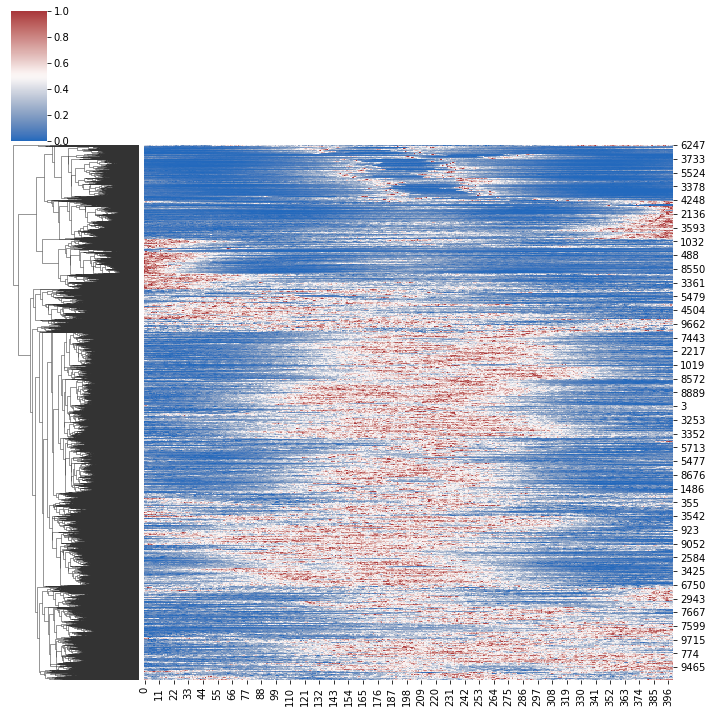

In [26]:
g = sns.clustermap(bias_corrected_vals, standard_scale=0, cmap="vlag", col_cluster=False)

In [27]:
import matplotlib.pyplot as plt

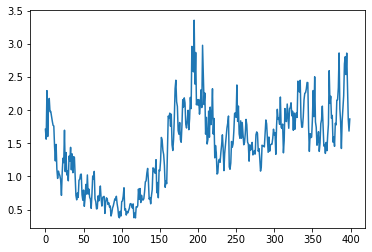

In [29]:
plt.plot(bias_corrected_vals[2943,])